# Load data and functions

For this tutorial, we use a subset of Norman et al., 2019 Perturb-seq dataset and showcase the usage of BasCoD for identifying the synergistic effect of perturbing two genes simultaneosuly. Here, for a pair of genes, we regard the double perturbed cells as target and the single perturbed cells as background. We also consider two pairs of genes, (KLF1, CEBPA) and (CEBPA, CEBPB).

In [1]:
library(dplyr)
source('/storage10/kwangmoon/BasCoD/Rcodes/functions/BasCoD.R')


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select




## First pair (KLF1 and CEBPA)

In [2]:

target_KLF1_CEBPA=readRDS('/storage10/kwangmoon/BasCoD/data/KLF1_CEBPA_double.rds')
background_KLF1_CEBPA=readRDS('/storage10/kwangmoon/BasCoD/data/KLF1_CEBPA_single.rds')


## Second pair (CEBPA and CEBPB)

In [3]:

target_CEBPA_CEBPB=readRDS('/storage10/kwangmoon/BasCoD/data/CEBPA_CEBPB_double.rds')
background_CEBPA_CEBPB=readRDS('/storage10/kwangmoon/BasCoD/data/CEBPA_CEBPB_single.rds')


# BASCOD test for the two pairs of genes 

In [4]:
X_0=target_KLF1_CEBPA
X_j=background_KLF1_CEBPA
prc_0=prcomp(X_0)
prc_j=prcomp(X_j)
embedding_0=prc_0$x
embedding_j=prc_j$x
print("First pair : KLF1_CEBPA")
bascod_res=BasCoD_single(X_0=X_0,X_j=X_j,R_0=10,R_j=5,embedding_0=embedding_0,embedding_j = embedding_j,eps=0.3)

X_0=target_CEBPA_CEBPB
X_j=background_CEBPA_CEBPB
prc_0=prcomp(X_0)
prc_j=prcomp(X_j)
embedding_0=prc_0$x
embedding_j=prc_j$x
print("Second pair : CEBPA_CEBPB")
bascod_res=BasCoD_single(X_0=X_0,X_j=X_j,R_0=10,R_j=5,embedding_0=embedding_0,embedding_j = embedding_j,eps=0.3)


[1] "First pair : KLF1_CEBPA"
[1] "BasCoD p-value is : 1"
[1] "Second pair : CEBPA_CEBPB"
[1] "BasCoD p-value is : 1.01498703556628e-229"


The BasCoD test results show that the double perturbation on KLF1 and CEBPA span a space containing that of the single perturbation, which could potentially mean synergistic effect of perturbing the two genes.

# tSNE visual representation

In [5]:
# first pair
set.seed(1)
library(Rtsne)
X=rbind(background_KLF1_CEBPA,target_KLF1_CEBPA)
TSNE_res_KLF1_CEBPA=Rtsne(X,dims = 3)
lab_KLF1_CEBPA=c(rep("background", nrow(background_KLF1_CEBPA)), rep('target', nrow(target_KLF1_CEBPA)))
colors=lab_KLF1_CEBPA %>% as.factor %>% as.numeric
colors=ifelse(colors==1,"red","black")


In [6]:
# second pair
set.seed(1)
library(Rtsne)
X=rbind(background_CEBPA_CEBPB,target_CEBPA_CEBPB)
TSNE_res_CEBPA_CEBPB=Rtsne(X,dims = 3)
lab_CEBPA_CEBPB=c(rep("background", nrow(background_CEBPA_CEBPB)), rep('target', nrow(target_CEBPA_CEBPB)))
colors=lab_CEBPA_CEBPB %>% as.factor %>% as.numeric
colors=ifelse(colors==1,"red","black")


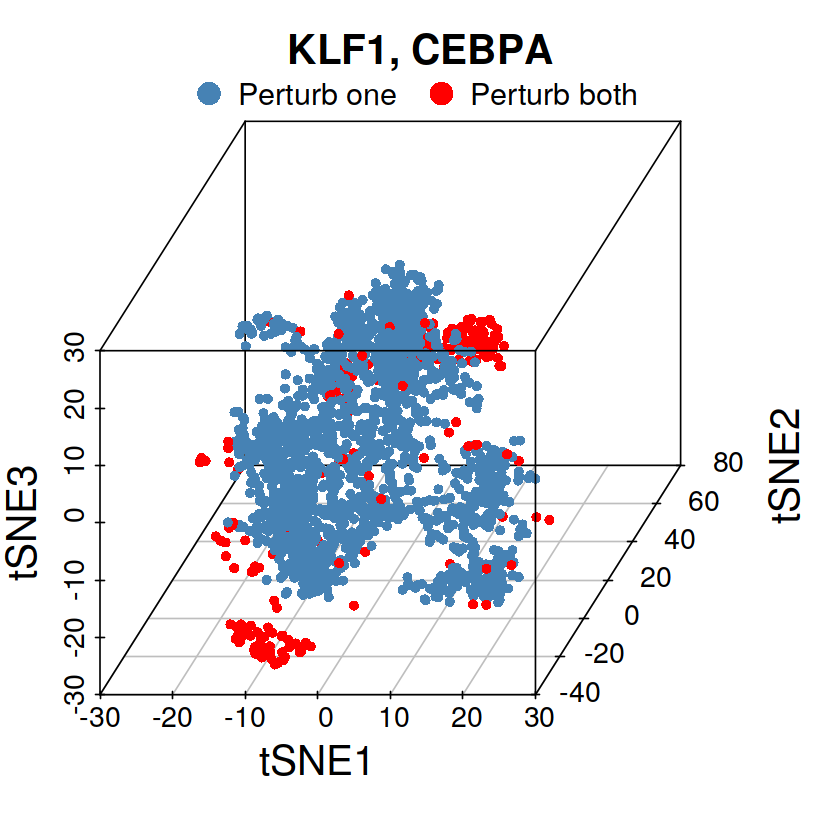

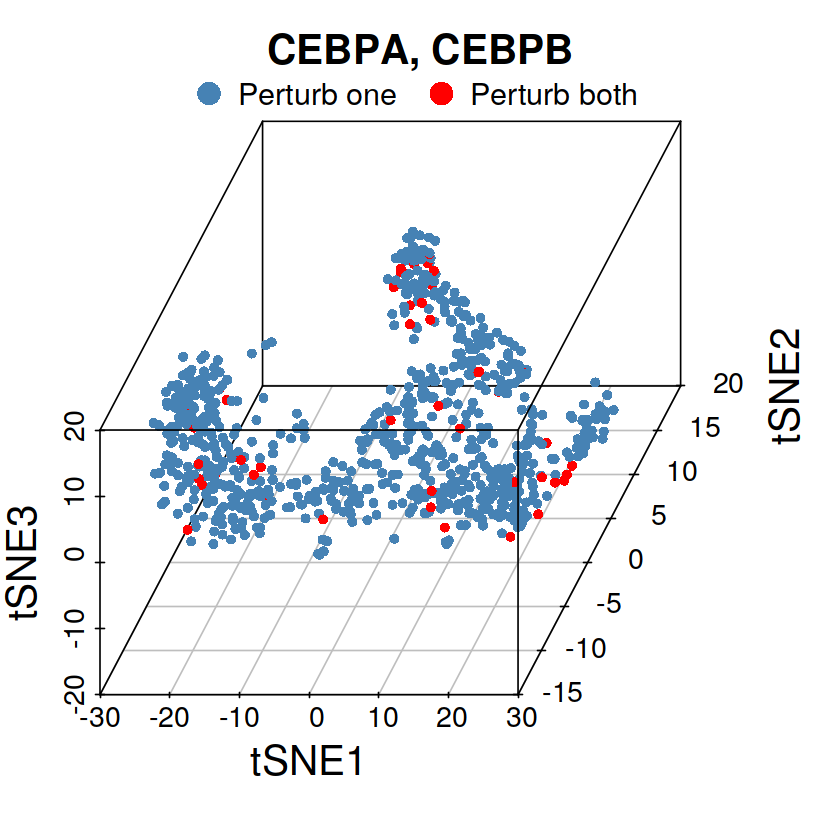

In [7]:
library(scatterplot3d)

all_coords <- rbind(
  TSNE_res_KLF1_CEBPA$Y,
  TSNE_res_CEBPA_CEBPB$Y
)
xlim <- range(all_coords[,1])
ylim <- range(all_coords[,2])
zlim <- range(all_coords[,3])

palette_colors <- c("steelblue","red")

plot_3d_tsne <- function(Y, lab, title) {
  cols <- as.numeric(as.factor(lab))
  scatterplot3d(
    Y[,1], Y[,2], Y[,3],
    color = palette_colors[cols],
    pch = 16,
    xlab = "tSNE1",
    ylab = "tSNE2",
    zlab = "tSNE3",
    angle = 60,        
    scale.y = 1,       
    cex.lab = 2,
    cex.axis = 1.4,
    cex.main = 2,
    main = title
  )
     legend(
    "top",
    legend = c("Perturb one", "Perturb both"),
    col = c("steelblue", "red"),
    pch = 16,
    pt.cex = 2.5,
    bty = "n",
    text.col = "black",
    cex = 1.5,
      inset = -0.07, xpd = TRUE, horiz = TRUE
  )
}


par(mfrow = c(1, 1))  
plot_3d_tsne(TSNE_res_KLF1_CEBPA$Y,  lab_KLF1_CEBPA,  "KLF1, CEBPA")
plot_3d_tsne(TSNE_res_CEBPA_CEBPB$Y, lab_CEBPA_CEBPB, "CEBPA, CEBPB")





A visual representation also confirms that the cells with double perturbation on KLF1 and CEBPA lie on a larger space than those with single perturbation.